# COVID-19 Vaccination Progress - Visuvalization
**Input dataset copied from kaggle**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Read input dataset, CSV file is available in the same folder so no need to mention the path

In [14]:
df=pd.read_csv('country_vaccinations.csv')

In [15]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


##### Data preperation

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4678 non-null   object 
 1   iso_code                             4366 non-null   object 
 2   date                                 4678 non-null   object 
 3   total_vaccinations                   3054 non-null   float64
 4   people_vaccinated                    2595 non-null   float64
 5   people_fully_vaccinated              1746 non-null   float64
 6   daily_vaccinations_raw               2576 non-null   float64
 7   daily_vaccinations                   4518 non-null   float64
 8   total_vaccinations_per_hundred       3054 non-null   float64
 9   people_vaccinated_per_hundred        2595 non-null   float64
 10  people_fully_vaccinated_per_hundred  1746 non-null   float64
 11  daily_vaccinations_per_million

In [18]:
df.isnull().sum()

country                                   0
iso_code                                312
date                                      0
total_vaccinations                     1624
people_vaccinated                      2083
people_fully_vaccinated                2932
daily_vaccinations_raw                 2102
daily_vaccinations                      160
total_vaccinations_per_hundred         1624
people_vaccinated_per_hundred          2083
people_fully_vaccinated_per_hundred    2932
daily_vaccinations_per_million          160
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

#### Analysis
**1) iso_code is missing in 312 rows**
**2) Vaccination count is missing in multiple columns**

In [22]:
# Find the country names for missing iso_codes
df[df['iso_code'].isnull()].country.unique()

array(['England', 'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

In [23]:
# All countries who missing iso_code from GBR, so fill the value.
df['iso_code'].fillna('GBR',inplace=True)

In [24]:
# In case of no Vacination numbers, fill with 0
df.fillna(0,inplace=True)

In [25]:
#Check still any nulls in dataset
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

#### DATA ANALYSIS AND VISUALIZATION - Belgium

In [44]:
df_Belgium = df[df["iso_code"]  =="BEL"].copy()

In [45]:
df_Belgium.shape

(63, 15)

In [31]:
df_Belgium[df_Belgium['people_vaccinated'] == 0]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
435,Belgium,BEL,2021-01-02,0.0,0.0,0.0,0.0,178.0,0.0,0.0,0.0,15.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Sciensano,https://epistat.wiv-isp.be/covid/
436,Belgium,BEL,2021-01-03,0.0,0.0,0.0,0.0,214.0,0.0,0.0,0.0,18.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Sciensano,https://epistat.wiv-isp.be/covid/
437,Belgium,BEL,2021-01-04,0.0,0.0,0.0,0.0,240.0,0.0,0.0,0.0,21.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Sciensano,https://epistat.wiv-isp.be/covid/


In [46]:
df_Belgium.drop(df_Belgium.index[df_Belgium['people_vaccinated'] == 0],axis=0,inplace = True)

In [47]:
df_Belgium.shape

(60, 15)

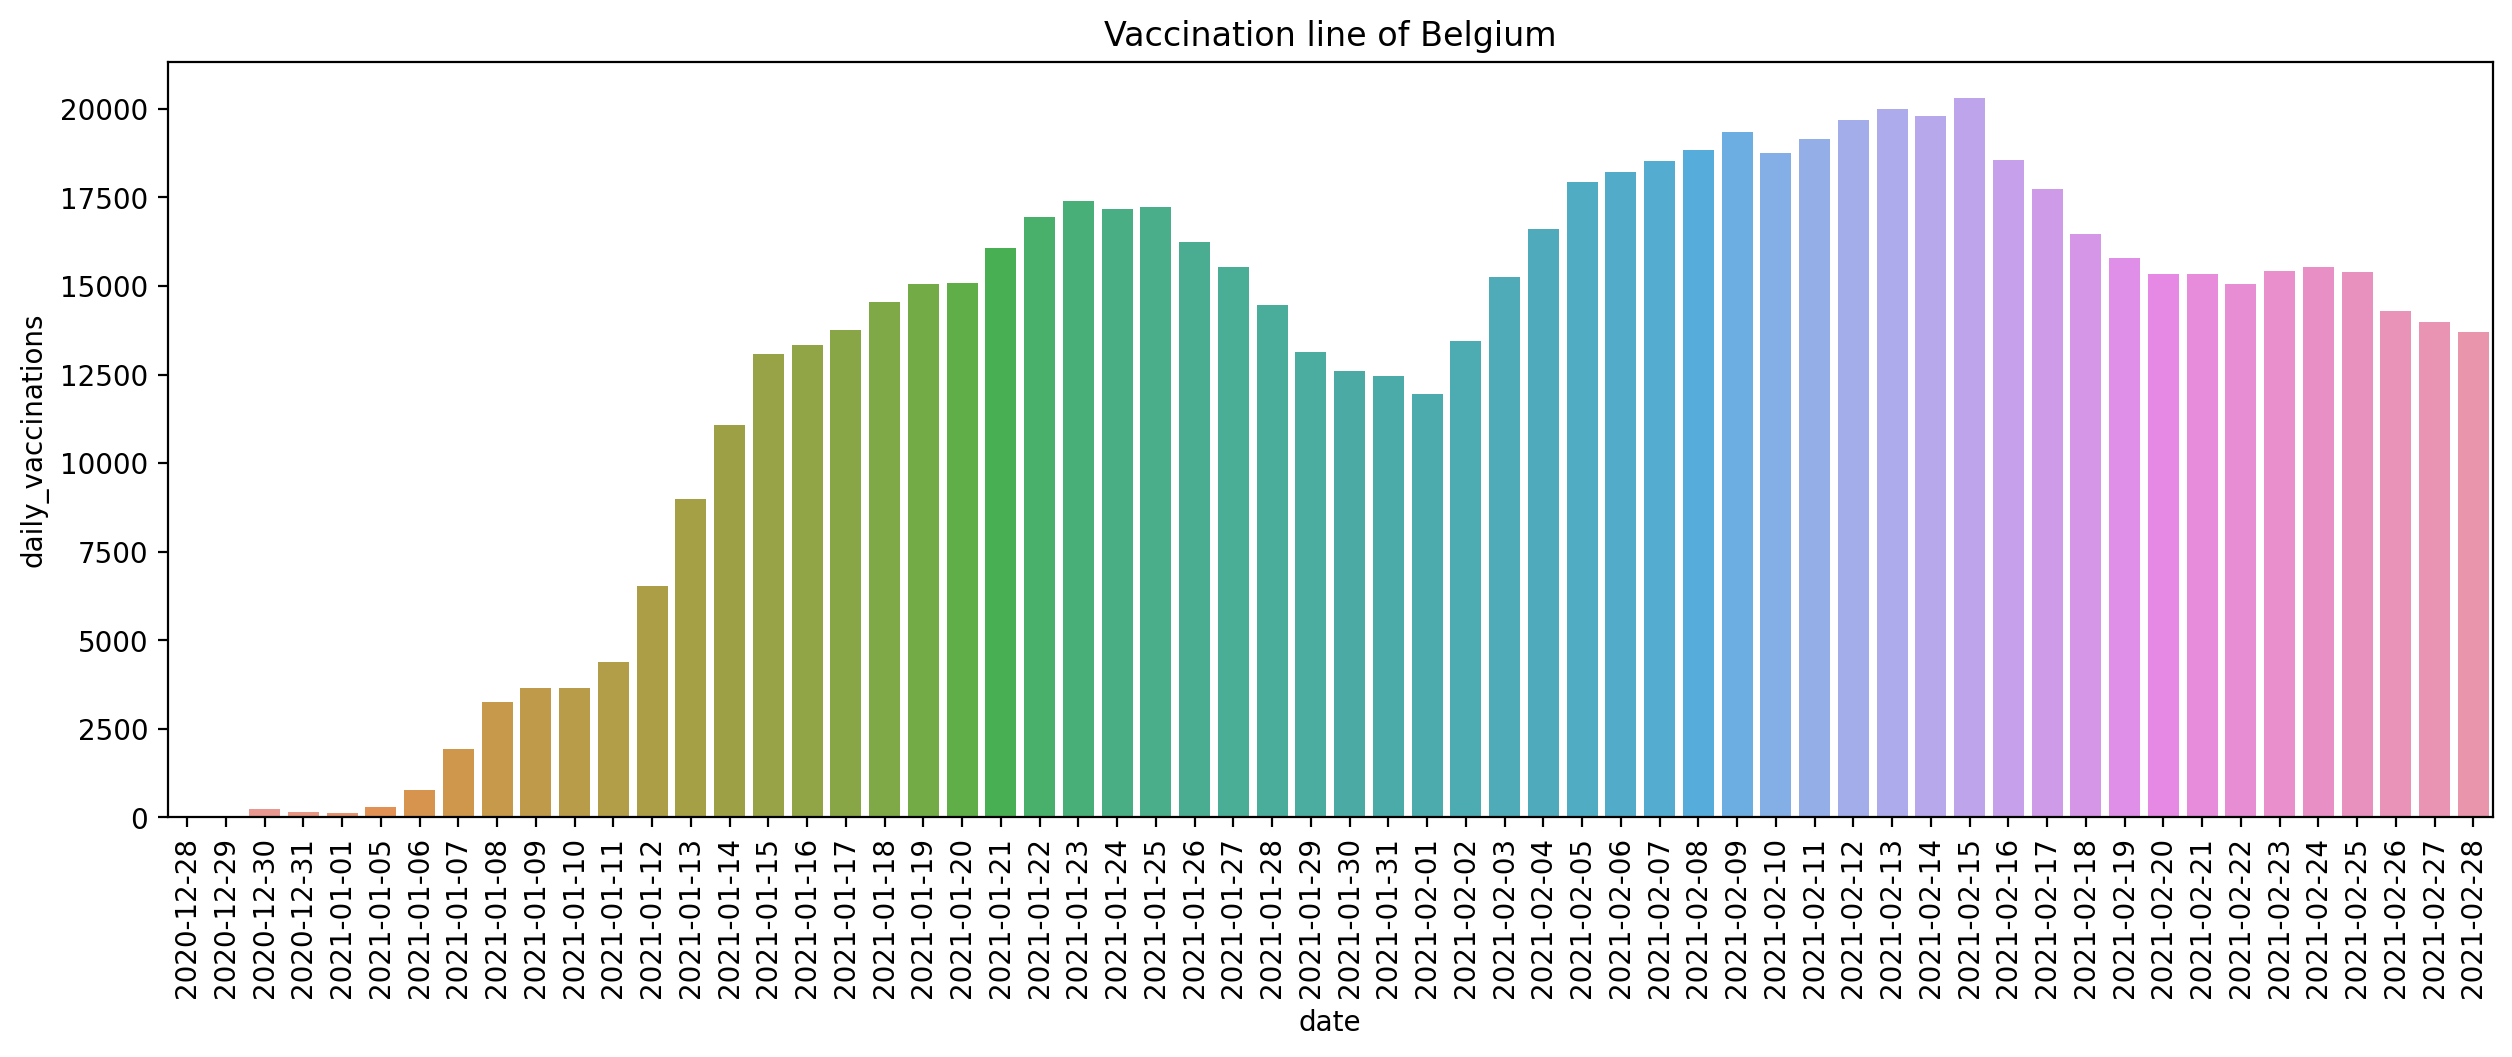

In [52]:
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df_Belgium,x="date",y="daily_vaccinations")
plt.title("Vaccination line of Belgium")
plt.xticks(rotation=90)
plt.show()

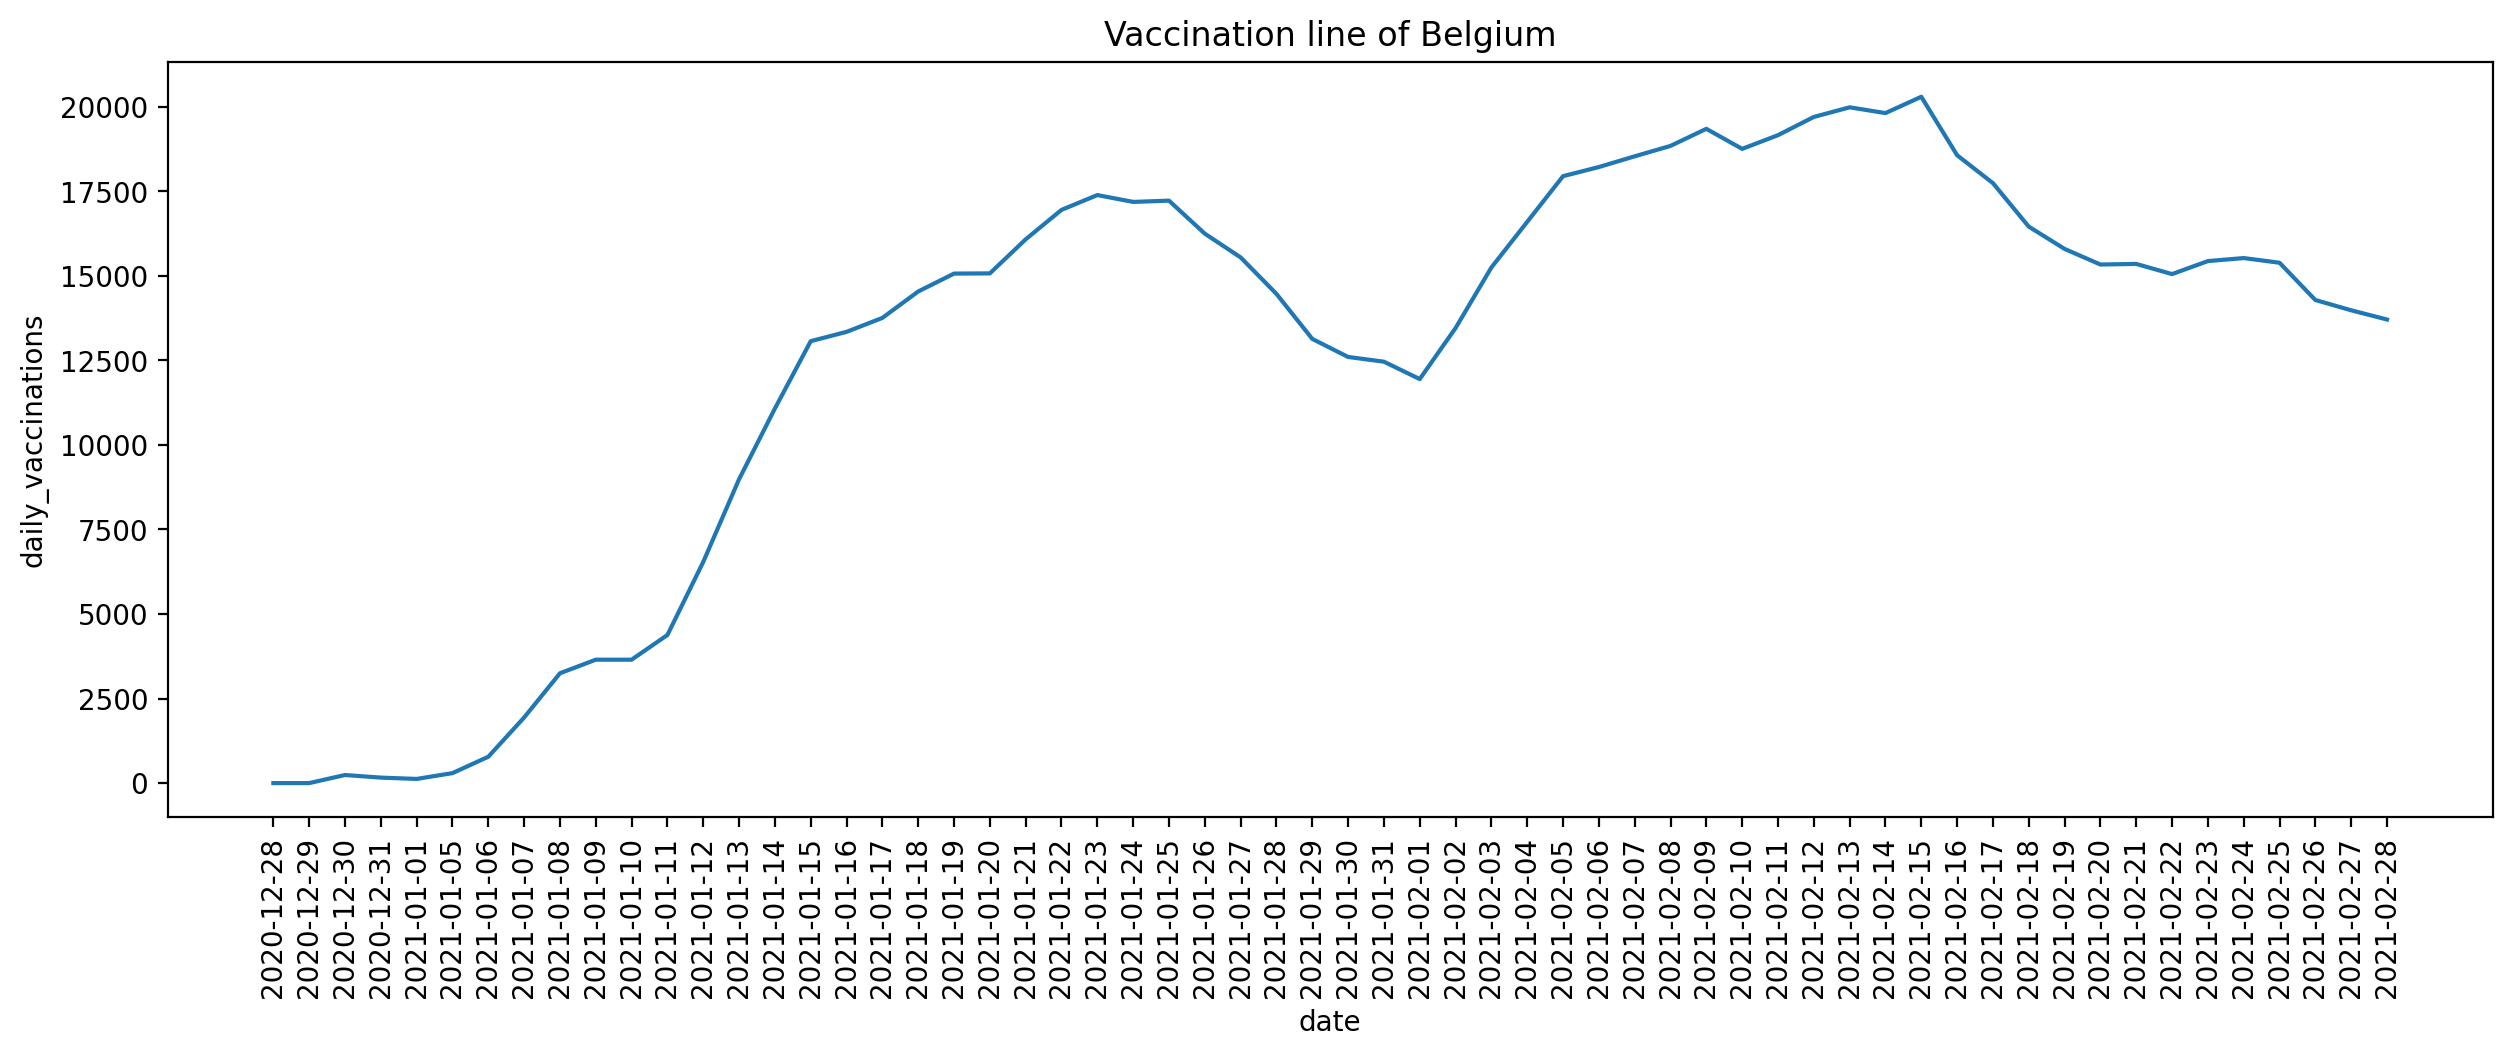

In [53]:
plt.figure(figsize=(15,5),dpi=200)
sns.lineplot(data=df_Belgium,x="date",y="daily_vaccinations")
plt.title("Vaccination line of Belgium")
plt.xticks(rotation=90)
plt.show()

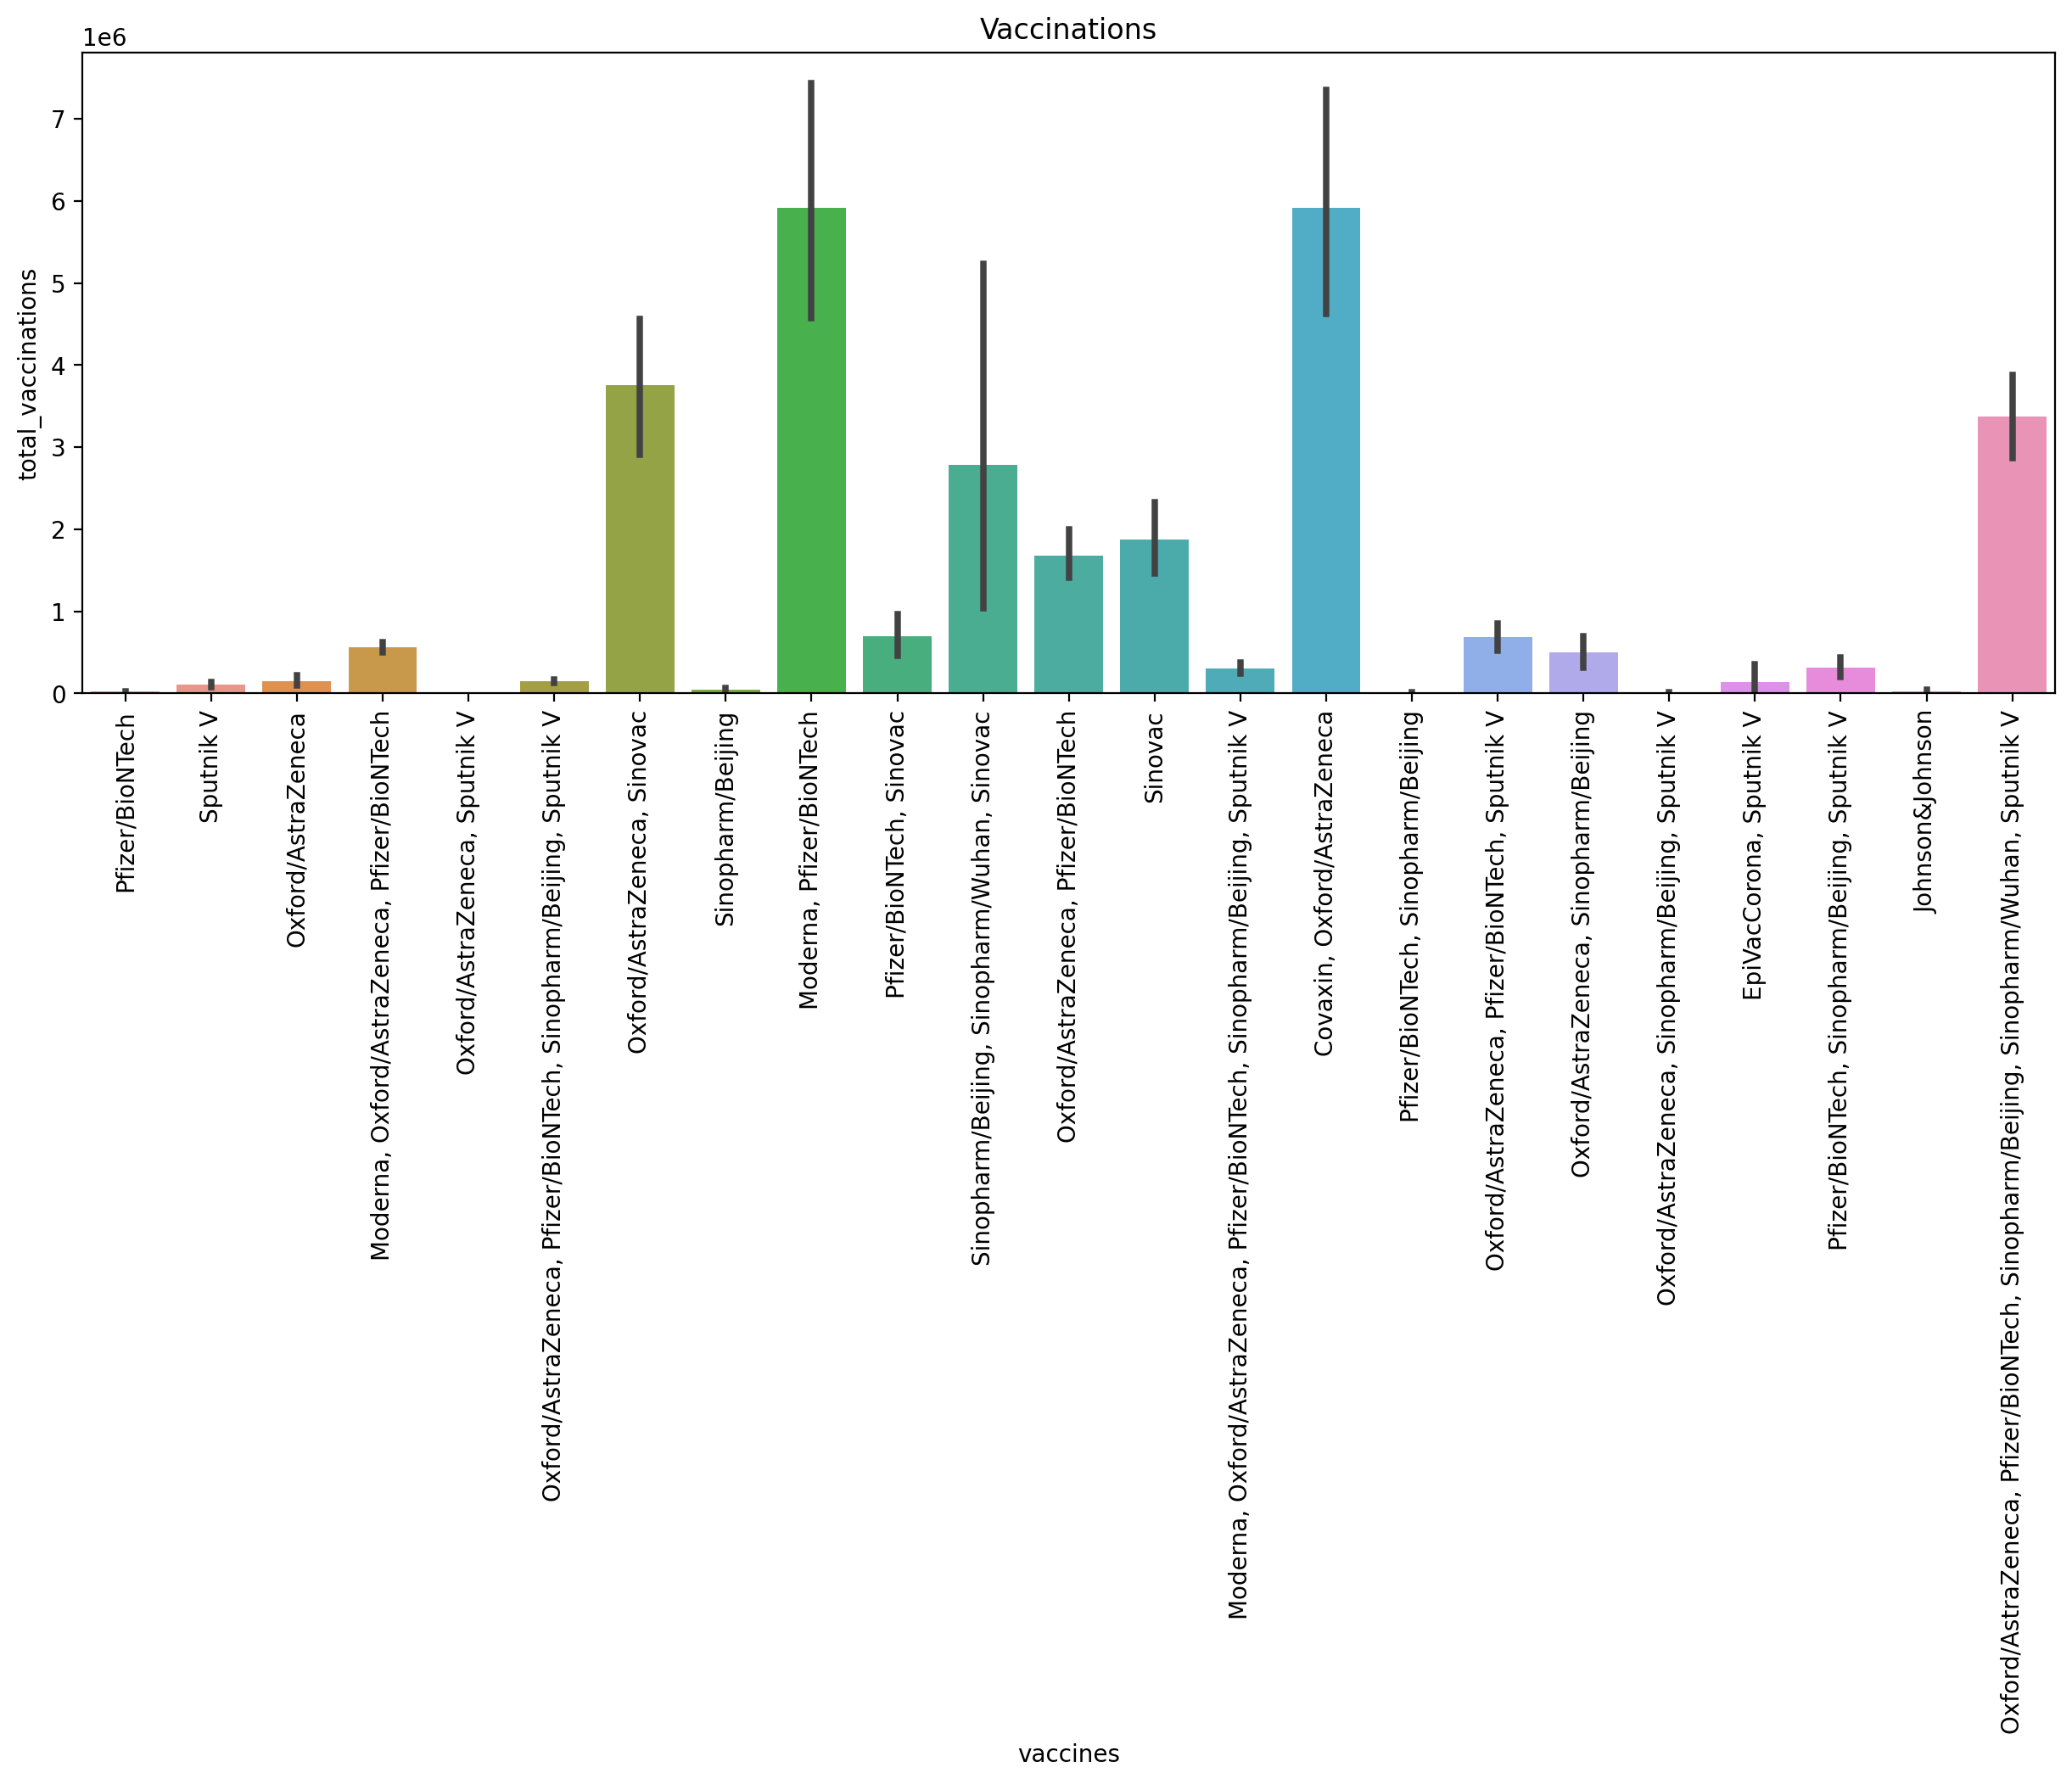

In [57]:
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df,x="vaccines",y="total_vaccinations")
plt.title("Vaccinations")
plt.xticks(rotation=90)
plt.show()